### Controller Demo

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

In [6]:
# set_log_level_warning()
# set_log_level_info()
set_log_level_debug()

This notebook demonstrates how to do the following:
1. Create a list of chemical randomly drawn from HMDB.
2. Create a new mass spec object, takes chemicals as input.
3. Create a new controller and runs the mass spec.
4. Write mzml files.

Load densities trained on 19 beer data (see [loader_kde](loader_kde.ipynb)).

In [7]:
base_dir = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\'

In [8]:
ps = load_obj(os.path.join(base_dir, 'Trained Models\\peak_sampler_19_beers.p'))

Load chromatogram data exported from R

In [9]:
cc = ChromatogramCreator(os.path.join(base_dir, 'Trained Models\\chromatogram_19_beers.csv.gz'))

INFO:ChromatogramCreator:Loading 0 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 1674
DEBUG:ChromatogramCreator:Invalid chromatogram 1778
DEBUG:ChromatogramCreator:Invalid chromatogram 1932
DEBUG:ChromatogramCreator:Invalid chromatogram 1989
DEBUG:ChromatogramCreator:Invalid chromatogram 2052
DEBUG:ChromatogramCreator:Invalid chromatogram 2276
DEBUG:ChromatogramCreator:Invalid chromatogram 2296
DEBUG:ChromatogramCreator:Invalid chromatogram 2424
DEBUG:ChromatogramCreator:Invalid chromatogram 2557
DEBUG:ChromatogramCreator:Invalid chromatogram 2559
DEBUG:ChromatogramCreator:Invalid chromatogram 2586
DEBUG:ChromatogramCreator:Invalid chromatogram 2610
DEBUG:ChromatogramCreator:Invalid chromatogram 3173
DEBUG:ChromatogramCreator:Invalid chromatogram 3208
DEBUG:ChromatogramCreator:Invalid chromatogram 3238
DEBUG:ChromatogramCreator:Invalid chromatogram 3252
DEBUG:ChromatogramCreator:Invalid chromatogram 3484
DEBUG:ChromatogramCreator:Invalid chromatogram 3547
DEBUG:Chromatog

DEBUG:ChromatogramCreator:Invalid chromatogram 43082
DEBUG:ChromatogramCreator:Invalid chromatogram 43485
DEBUG:ChromatogramCreator:Invalid chromatogram 43529
DEBUG:ChromatogramCreator:Invalid chromatogram 43936
DEBUG:ChromatogramCreator:Invalid chromatogram 43996
DEBUG:ChromatogramCreator:Invalid chromatogram 44322
DEBUG:ChromatogramCreator:Invalid chromatogram 44788
INFO:ChromatogramCreator:Loading 45000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 45111
DEBUG:ChromatogramCreator:Invalid chromatogram 45951
DEBUG:ChromatogramCreator:Invalid chromatogram 45979
DEBUG:ChromatogramCreator:Invalid chromatogram 46300
DEBUG:ChromatogramCreator:Invalid chromatogram 46346
DEBUG:ChromatogramCreator:Invalid chromatogram 46596
DEBUG:ChromatogramCreator:Invalid chromatogram 46609
DEBUG:ChromatogramCreator:Invalid chromatogram 46638
DEBUG:ChromatogramCreator:Invalid chromatogram 46817
DEBUG:ChromatogramCreator:Invalid chromatogram 47544
DEBUG:ChromatogramCreator:Invalid chromatogram

DEBUG:ChromatogramCreator:Invalid chromatogram 77285
DEBUG:ChromatogramCreator:Invalid chromatogram 77309
DEBUG:ChromatogramCreator:Invalid chromatogram 77404
DEBUG:ChromatogramCreator:Invalid chromatogram 77551
DEBUG:ChromatogramCreator:Invalid chromatogram 77656
DEBUG:ChromatogramCreator:Invalid chromatogram 77778
DEBUG:ChromatogramCreator:Invalid chromatogram 78411
DEBUG:ChromatogramCreator:Invalid chromatogram 78413
DEBUG:ChromatogramCreator:Invalid chromatogram 78658
DEBUG:ChromatogramCreator:Invalid chromatogram 78754
DEBUG:ChromatogramCreator:Invalid chromatogram 78857
DEBUG:ChromatogramCreator:Invalid chromatogram 79144
DEBUG:ChromatogramCreator:Invalid chromatogram 79169
DEBUG:ChromatogramCreator:Invalid chromatogram 79322
DEBUG:ChromatogramCreator:Invalid chromatogram 79363
INFO:ChromatogramCreator:Loading 80000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 80563
DEBUG:ChromatogramCreator:Invalid chromatogram 80695
DEBUG:ChromatogramCreator:Invalid chromatogram

DEBUG:ChromatogramCreator:Invalid chromatogram 105782
DEBUG:ChromatogramCreator:Invalid chromatogram 106020
DEBUG:ChromatogramCreator:Invalid chromatogram 106084
DEBUG:ChromatogramCreator:Invalid chromatogram 106385
DEBUG:ChromatogramCreator:Invalid chromatogram 106418
DEBUG:ChromatogramCreator:Invalid chromatogram 106429
DEBUG:ChromatogramCreator:Invalid chromatogram 106995
DEBUG:ChromatogramCreator:Invalid chromatogram 107155
DEBUG:ChromatogramCreator:Invalid chromatogram 107174
DEBUG:ChromatogramCreator:Invalid chromatogram 107601
DEBUG:ChromatogramCreator:Invalid chromatogram 107628
DEBUG:ChromatogramCreator:Invalid chromatogram 108028
DEBUG:ChromatogramCreator:Invalid chromatogram 108197
DEBUG:ChromatogramCreator:Invalid chromatogram 108439
DEBUG:ChromatogramCreator:Invalid chromatogram 108492
DEBUG:ChromatogramCreator:Invalid chromatogram 108538
DEBUG:ChromatogramCreator:Invalid chromatogram 108781
DEBUG:ChromatogramCreator:Invalid chromatogram 108856
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 133306
DEBUG:ChromatogramCreator:Invalid chromatogram 133322
DEBUG:ChromatogramCreator:Invalid chromatogram 133426
DEBUG:ChromatogramCreator:Invalid chromatogram 133789
DEBUG:ChromatogramCreator:Invalid chromatogram 133832
DEBUG:ChromatogramCreator:Invalid chromatogram 133882
DEBUG:ChromatogramCreator:Invalid chromatogram 134113
DEBUG:ChromatogramCreator:Invalid chromatogram 134199
DEBUG:ChromatogramCreator:Invalid chromatogram 134241
DEBUG:ChromatogramCreator:Invalid chromatogram 134262
DEBUG:ChromatogramCreator:Invalid chromatogram 134320
DEBUG:ChromatogramCreator:Invalid chromatogram 134488
DEBUG:ChromatogramCreator:Invalid chromatogram 134876
DEBUG:ChromatogramCreator:Invalid chromatogram 134942
INFO:ChromatogramCreator:Loading 135000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 135316
DEBUG:ChromatogramCreator:Invalid chromatogram 135591
DEBUG:ChromatogramCreator:Invalid chromatogram 135700
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 156966
DEBUG:ChromatogramCreator:Invalid chromatogram 157243
DEBUG:ChromatogramCreator:Invalid chromatogram 157263
DEBUG:ChromatogramCreator:Invalid chromatogram 157289
DEBUG:ChromatogramCreator:Invalid chromatogram 157581
DEBUG:ChromatogramCreator:Invalid chromatogram 157622
DEBUG:ChromatogramCreator:Invalid chromatogram 157634
DEBUG:ChromatogramCreator:Invalid chromatogram 157816
DEBUG:ChromatogramCreator:Invalid chromatogram 157994
DEBUG:ChromatogramCreator:Invalid chromatogram 158645
DEBUG:ChromatogramCreator:Invalid chromatogram 158694
DEBUG:ChromatogramCreator:Invalid chromatogram 158748
DEBUG:ChromatogramCreator:Invalid chromatogram 159050
DEBUG:ChromatogramCreator:Invalid chromatogram 159105
DEBUG:ChromatogramCreator:Invalid chromatogram 159200
DEBUG:ChromatogramCreator:Invalid chromatogram 159202
DEBUG:ChromatogramCreator:Invalid chromatogram 159435
DEBUG:ChromatogramCreator:Invalid chromatogram 159725
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 178416
DEBUG:ChromatogramCreator:Invalid chromatogram 178585
DEBUG:ChromatogramCreator:Invalid chromatogram 178668
DEBUG:ChromatogramCreator:Invalid chromatogram 178731
DEBUG:ChromatogramCreator:Invalid chromatogram 179006
DEBUG:ChromatogramCreator:Invalid chromatogram 179153
DEBUG:ChromatogramCreator:Invalid chromatogram 179396
DEBUG:ChromatogramCreator:Invalid chromatogram 179412
DEBUG:ChromatogramCreator:Invalid chromatogram 179798
DEBUG:ChromatogramCreator:Invalid chromatogram 179928
INFO:ChromatogramCreator:Loading 180000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 180009
DEBUG:ChromatogramCreator:Invalid chromatogram 180180
DEBUG:ChromatogramCreator:Invalid chromatogram 180284
DEBUG:ChromatogramCreator:Invalid chromatogram 180348
DEBUG:ChromatogramCreator:Invalid chromatogram 180396
DEBUG:ChromatogramCreator:Invalid chromatogram 180507
DEBUG:ChromatogramCreator:Invalid chromatogram 180551
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 196117
DEBUG:ChromatogramCreator:Invalid chromatogram 197009
DEBUG:ChromatogramCreator:Invalid chromatogram 197029
DEBUG:ChromatogramCreator:Invalid chromatogram 197149
DEBUG:ChromatogramCreator:Invalid chromatogram 197178
DEBUG:ChromatogramCreator:Invalid chromatogram 197197
DEBUG:ChromatogramCreator:Invalid chromatogram 197336
DEBUG:ChromatogramCreator:Invalid chromatogram 197353
DEBUG:ChromatogramCreator:Invalid chromatogram 197398
DEBUG:ChromatogramCreator:Invalid chromatogram 197492
DEBUG:ChromatogramCreator:Invalid chromatogram 197493
DEBUG:ChromatogramCreator:Invalid chromatogram 197576
DEBUG:ChromatogramCreator:Invalid chromatogram 197656
DEBUG:ChromatogramCreator:Invalid chromatogram 197873
DEBUG:ChromatogramCreator:Invalid chromatogram 197901
DEBUG:ChromatogramCreator:Invalid chromatogram 198085
DEBUG:ChromatogramCreator:Invalid chromatogram 198250
DEBUG:ChromatogramCreator:Invalid chromatogram 198293
DEBUG:ChromatogramCreator:In

### Generate some chemicals

In [10]:
hmdb = load_obj(os.path.join(base_dir, 'Trained Models\\hmdb_compounds.p'))

In [11]:
chemicals = ChemicalCreator(ps)

In [12]:
min_ms1_intensity = 2E5
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1000)]
n_ms1_peaks = 1000
alpha = 0.1
# alpha = math.inf
dataset = chemicals.sample(cc, mz_range, rt_range, min_ms1_intensity, n_ms1_peaks, ms_levels=2, chemical_type='Known',
               formula_list=None, compound_list=hmdb, alpha=math.inf, fixed_mz=False)

DEBUG:ChemicalCreator:1000 ms1 peaks to be created.
DEBUG:ChemicalCreator:i = 0
DEBUG:ChemicalCreator:i = 25
DEBUG:ChemicalCreator:i = 50
DEBUG:ChemicalCreator:i = 75
DEBUG:ChemicalCreator:i = 100
DEBUG:ChemicalCreator:i = 125
DEBUG:ChemicalCreator:i = 150
DEBUG:ChemicalCreator:i = 175
DEBUG:ChemicalCreator:i = 200
DEBUG:ChemicalCreator:i = 225
DEBUG:ChemicalCreator:i = 250
DEBUG:ChemicalCreator:i = 275
DEBUG:ChemicalCreator:i = 300
DEBUG:ChemicalCreator:i = 325
DEBUG:ChemicalCreator:i = 350
DEBUG:ChemicalCreator:i = 375
DEBUG:ChemicalCreator:i = 400
DEBUG:ChemicalCreator:i = 425
DEBUG:ChemicalCreator:i = 450
DEBUG:ChemicalCreator:i = 475
DEBUG:ChemicalCreator:i = 500
DEBUG:ChemicalCreator:i = 525
DEBUG:ChemicalCreator:i = 550
DEBUG:ChemicalCreator:i = 575
DEBUG:ChemicalCreator:i = 600
DEBUG:ChemicalCreator:i = 625
DEBUG:ChemicalCreator:i = 650
DEBUG:ChemicalCreator:i = 675
DEBUG:ChemicalCreator:i = 700
DEBUG:ChemicalCreator:i = 725
DEBUG:ChemicalCreator:i = 750
DEBUG:ChemicalCreator:i

KnownChemical - 'C17H19N5O3' rt=788.15 max_intensity=473646.94
[ 98249.29 150425.3  103422.9  309059.4  205124.5  294146.8  148979.9
 107366.7  473644.2  377347.8  337048.5  319713.5  272661.8  141555.4
 196442.2   84794.15  68079.67]


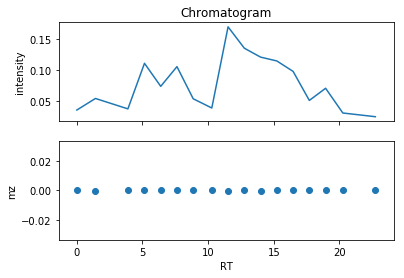

KnownChemical - 'C12H22O4' rt=347.42 max_intensity=260778.44
[ 18880.93   72599.52   80456.96   69844.17  157487.3    98585.23
 116768.8   170902.9   189377.4   241144.8   210079.    251979.
 208962.6   241938.2   260778.8   235589.4   254097.9   213729.
 224031.2   183458.2   154624.8   174803.1   110186.2    96802.85
 101026.4    86137.41   66634.7    21916.73   88882.4    60980.98
  46481.4    15530.76    9275.187  18843.53   13213.92   17460.13
   8995.583  10023.28    9152.804]


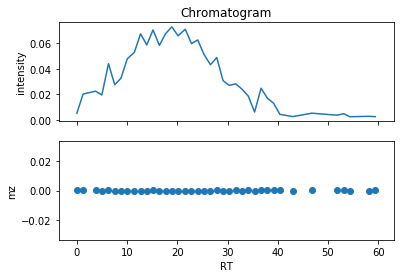

KnownChemical - 'C5H2Cl3NO2' rt=549.65 max_intensity=3657958.82
[2157038. 3061594. 2572804. 2976207. 3286754. 3657926. 3343142. 3654612.
 2265741. 2153799.]


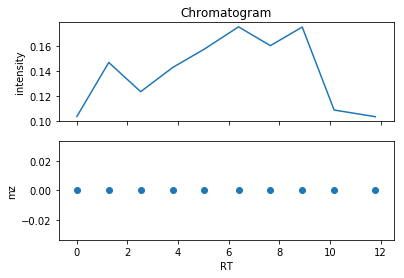

KnownChemical - 'C16H30O' rt=271.10 max_intensity=5233436.45
[4362746. 4721797. 4862644. 5045523. 5232929. 4862116. 4748490.]


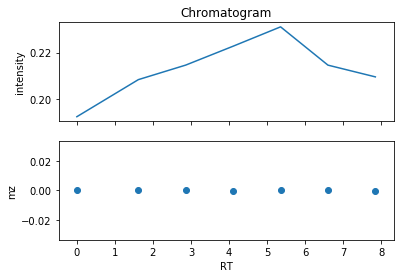

KnownChemical - 'C18H39N' rt=291.29 max_intensity=864946.10
[ 69964.72 216999.2  421659.8  663484.4  500166.2  810938.2  745897.6
 769412.9  677567.6  752162.8  720354.6  864948.9  719560.9  690655.4
 788153.9  829635.5  634688.9  586873.1  610875.6  497374.7  321480.6
 509078.1  462381.2 ]


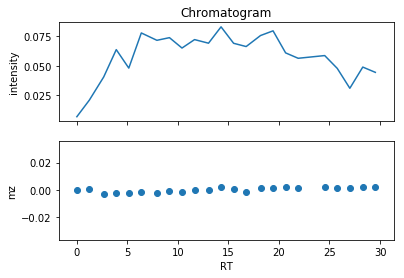

KnownChemical - 'C18H38O2' rt=967.78 max_intensity=300185.19
[ 30467.8  106247.5   90110.94 124226.2  300191.3  179025.9  232062.8
 111985.6  102320.8   48558.73 104169.6 ]


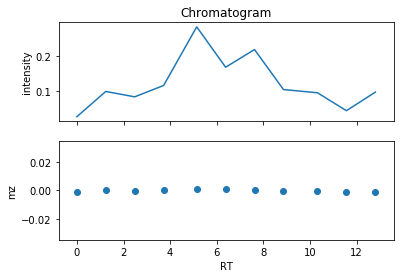

KnownChemical - 'C9H12NO5PS' rt=615.65 max_intensity=1434728.10
[ 628643.2  632751.2  568251.8  772032.7  820610.2  966952.4 1125892.
 1235346.  1194310.  1338044.  1354995.  1258415.  1434648.  1229785.
 1054547.  1004674.   815591.2  786984.9  534967.8  624183.7  683233.3
  670231.3  595563.8  520627.5  547478.5  456911.3]


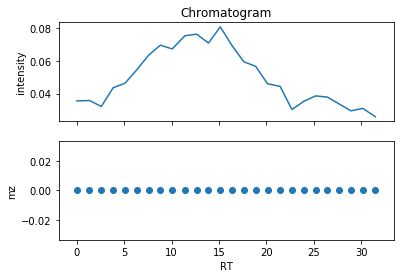

KnownChemical - 'C21H42O4' rt=974.53 max_intensity=684435.85
[573890.6 422896.8 565379.2 506282.6 535887.9 555252.5 632800.7 537743.1
 591378.7 511537.8 543064.8 684444.2 499272.7 521431.2 637241.9 664290.8
 548999.6 301971.2 458403.  646266.4 283029.1 589788.4 346684.5]


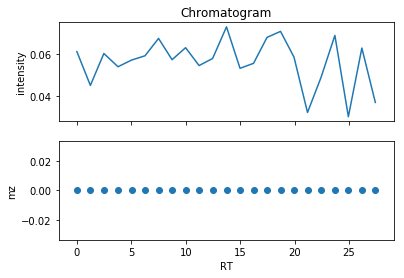

KnownChemical - 'C9H12NO5PS' rt=604.98 max_intensity=3222710.26
[2949226. 3222624. 3026710. 2934906. 3179112. 2573291. 2813986. 2026239.
 1874835. 1747144. 1108007.]


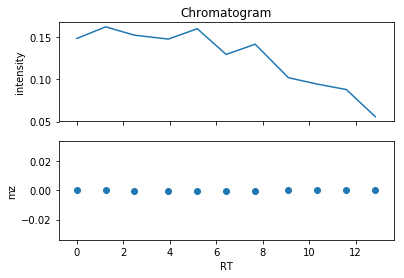

KnownChemical - 'C9H8O8S' rt=690.56 max_intensity=33216279.30
[ 2975940.  5144631.  6872601.  8533724. 12679049. 17165072. 21840372.
 25453374. 30707900. 33234714. 28926778. 32233026. 32631450. 30055318.
 27653478. 21539474. 17879080. 12685863.  9216052.  5005758.  2512976.
  1280100.]


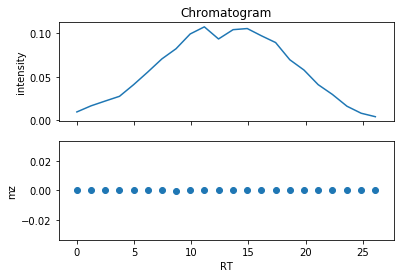

In [13]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in dataset[0:10]:
    print(chem)
    print(chem.chromatogram.raw_intensities)
    plot_chromatogram(chem.chromatogram)

### Set up a simple MS1 controller

In [14]:
set_log_level_warning() # We don't want to see too many messages as the controller is running

In [15]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = SimpleMs1Controller(mass_spec)
controller.make_plot = False
controller.run(rt_range[0][0], rt_range[0][1])

1080.0467327486174it [01:58,  9.11it/s]                                                                                                                                                                 


In [16]:
save_obj(controller, os.path.join(base_dir, 'Manuscript\\no_noise_ms1_controller.p'))

Print the peaks generated for each chemical

In [17]:
chem = controller.mass_spec.chemicals[0]
peaks = controller.mass_spec.chemicals_to_peaks[chem]
print(chem)
for i in range(len(peaks)):
    p = peaks[i]
    print(p)
    if i >= 3:
        break

KnownChemical - 'C17H19N5O3' rt=788.15 max_intensity=473646.94
Peak mz=342.1560 rt=788.18 intensity=3148.98 ms_level=1
Peak mz=383.1826 rt=788.18 intensity=2.61 ms_level=1
Peak mz=374.1823 rt=788.18 intensity=0.00 ms_level=1
Peak mz=359.1826 rt=788.18 intensity=8538.87 ms_level=1


Save to mzML file

In [18]:
controller.write_mzML('my_analysis', os.path.join(base_dir, 'Manuscript\\no_noise_ms1_controller.mzML'))

### Set up a Top-N controller

We can run the dataset through a top-N DDA controller

In [ ]:
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window (Dalton) around a selected precursor ion
rt_tol = 15                     # the rt window (second) around a selected precursor ion to prevent it from fragmented multiple times
min_ms1_intensity = 2.5E5       # the minimum ms1 peak intensity to be fragmented

In [ ]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms1_intensity)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

In [ ]:
controller.write_mzML('my_analysis', os.path.join(base_dir, 'Manuscript\\no_noise_top_N_controller.mzML'))

### Set up a DIA controller

We can run the dataset through a DIA controller

In [ ]:
dia_design = "basic"
window_type = "even"
kaufmann_design = None
extra_bins = 0
num_windows = 10

In [ ]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = TreeController(mass_spec, dia_design, window_type, kaufmann_design, extra_bins, num_windows)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

In [ ]:
controller.write_mzML('my_analysis', os.path.join(base_dir, 'Manuscript\\no_noise_dia_controller.mzML'))